<a href="https://colab.research.google.com/github/Amulya77/TFF/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to regression with neural network

There are many definitions for a regression problem but in our case, we'are going to simplify it: predicting a numerical variable based on some other combinaion of variables, even shorter... predicting a number.

In [59]:
#Import TEnsorflow

import tensorflow as tf
print(tf.__version__)

2.9.1


###Creating data to fit and view

In [60]:
import numpy as np
import matplotlib.pyplot as plt

#create features
x=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y= np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])


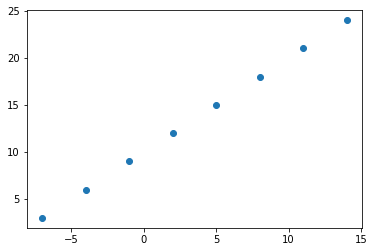

In [61]:
#visualize it
plt.scatter(x,y);

In [62]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# INput and output shapes

In [63]:
#Create a tesnor for our housing price prediction
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [64]:
x[0],y[0]



(-7.0, 3.0)

In [65]:
x[1], y[1]

(-4.0, 6.0)

In [66]:
input_shape=x.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [67]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape, output_shape

((), ())

In [68]:
x[0].ndim


0

In [69]:
x[0], y[0]

(-7.0, 3.0)

In [70]:
 #Turn out numpy array to tensors with dtype float 32
'''
at 4:44:50
running first neural network
Epoch 1/5
WARNING:tensorflow:Layer dense_3 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because its dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.'''
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [71]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

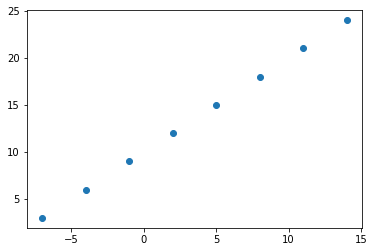

In [72]:
plt.scatter(x,y);

In [73]:
'''##OPtional creating 

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
'''


'##OPtional creating \n\nmodel=tf.keras.Sequential()\nmodel.add(tf.keras.layers.Dense(1))\n'

# STEPS in modelling with tensorflow
**1.Creating a model**-define the input and output layers,  as well as the hidden layers of a deep learning model.

**2.Compiling a model**- define the loss function(the function which tells our model how wrong it is)and the optimizer(tells how to improve the patterns its learning) and evaluation matrics(what we can use to interpret the performance of our model).

**3.fitting a model**-letting the model try to find patterns between x&y (features and labels)

In [74]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
#model.fit(x, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)
#epochs= laps or opportunities to fit the model that many times

#epochs=how many time the model will go throug all of the training examples.

Epoch 1/5
1/1 [==============================] - 0s 312ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [75]:
#Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [76]:
#Try and make prediction using our model
y_pred=model.predict([17.0]) 
y_pred

1/1 [==============================] - 0s 55ms/step


array([[12.716021]], dtype=float32)

In [77]:
y_pred+11

array([[23.71602]], dtype=float32)

# WATCH VIDEO AT 4:50:20

## IMPROVING THE MODEL

we can improve our model, by altering steps 

1.**Creating a model**-here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function.

2.**Compiling a model**- here wr might change the optimizing function or perhaps the **learnning rate** of the optimizing function.

3.**fitting a model**-here we might fit a model for more **epochs**(leave it training for longer) or on more data (give model more examples to learn from).

In [78]:
#lets rebuild our model

#1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3.fit the model
#model.fit(x,y,epochs=100)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 661ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

In [79]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [80]:
#lets see model prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 183ms/step


array([[29.739855]], dtype=float32)

# WATCH VIDEO AT 5:03:36

In [81]:
#Let's make another improvement

#1/.Create a model with extra hhidden layers with 100 hidden units
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
#3 fit the model
#model.fit(x,y,epochs=100)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 472ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6739 - mae: 10.6739
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.8419 - mae: 9.8419
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9962 - mae: 8.9962
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1347 - mae: 8.1347
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4053 - mae: 7.4053
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 6.6763 - mae: 6.6763
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 5.9141 - mae: 5.9141
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 5.1125 - mae: 5.1125
Epoch 11/100
1/1 [==============================] - 0s 10ms/step -

In [82]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [83]:
#lets see model prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 63ms/step


array([[27.159164]], dtype=float32)

#####Common ways to improve a deep model :




• Adding layers

• Increase the number of hidden units

• Change the activation functions

• Change the optimization function

. **Change the learning rate**

• Fitting on more data

• Fitting for longer
               ( because you can alter each of
               these , they're hyperparameters )

**EVALUATING A MODEL**
A typical workflow you'll go through when building neural networks is:

**Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...**


The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

**Visualize, visualize, visualize**

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

**The data** - what data are you working with? What does it look like?

**The model itself** - what does the architecture look like? What are the different shapes?

**The training of a model** - how does a model perform while it learns?

***The predictions of a model *** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

In [86]:
#make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [88]:
#make labels for dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

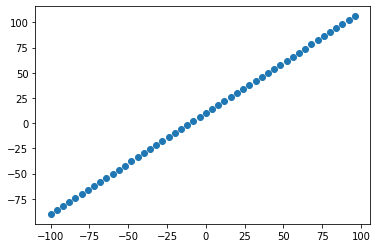

In [93]:
 #visualize the data
 import matplotlib.pyplot as plt
 plt.scatter(X,y)


###THE 3 sets 
Split data into training/test set-

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).
For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [95]:
#Check the length of how many samples we have

len(X)

50

In [96]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test) len(y_train), len(y_test)

(40, 10)

###Visualizing the data
Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

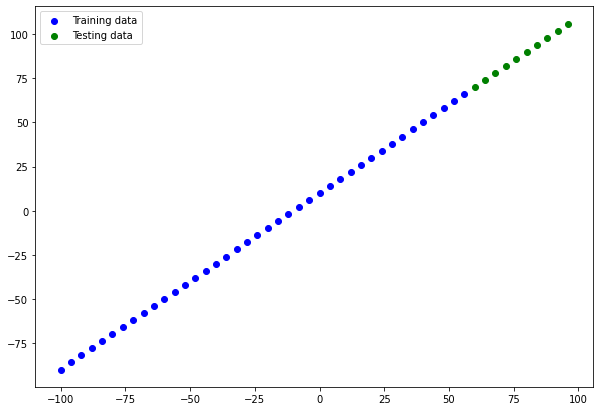

In [97]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea.

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (X_train) to draw the green dots (X_test).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [98]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

###Visualizing the model
After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling summary() on it.

🔑 Note: Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [99]:
# Doesn't work (model not fit/built)
model.summary()

ValueError: ignored

In [101]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [102]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


#DENSE means fully connected neural network

In [103]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during **transfer learning**).

📖 *** Resource:***  For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠 Exercise: Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.